In [1]:
# Krigging

In [2]:
from volumetricspy.stats import Dot,CloudPoints, Exponential, NScaler, OrdinaryKrigging
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance_matrix

In [3]:
x = [0,1,2,0,0,2]
y = [0,0,0,1,2,2]
v = [1,2,4,5,6,27]

dfp = pd.DataFrame({"x":x,"y":y,"v":v})

cp = CloudPoints().from_df(dfp, x='x',y='y',fields=['v'])
cp.df()

,x,y,z,crs,v
0,0.0,0.0,None,None,1.0
1,1.0,0.0,None,None,2.0
2,2.0,0.0,None,None,4.0
3,0.0,1.0,None,None,5.0
4,0.0,2.0,None,None,6.0
5,2.0,2.0,None,None,27.0


<AxesSubplot:xlabel='x', ylabel='y'>

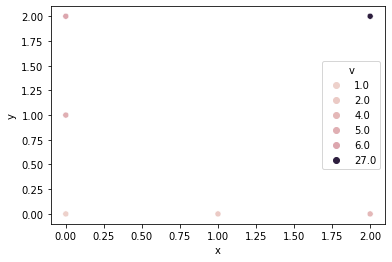

In [4]:
cp.plot(hue='v')

In [5]:
xu = [1,2,1,2,4,-1,8]
yu = [1,1,2,2,4,-1,8]
dfu = pd.DataFrame({"x":xu,"y":yu})
cpu = CloudPoints.from_df(dfu, x='x',y='y')
cpu.df()

,x,y,z,crs
0,1.0,1.0,None,None
1,2.0,1.0,None,None
2,1.0,2.0,None,None
3,2.0,2.0,None,None
4,4.0,4.0,None,None
5,-1.0,-1.0,None,None
6,8.0,8.0,None,None


<AxesSubplot:>

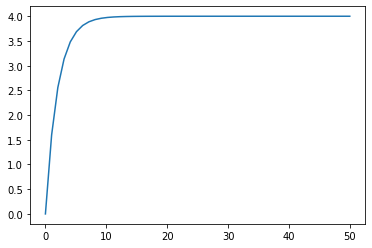

In [6]:
s = Exponential(
    sill = 4.,
    range = 2,
    nugget = 0.
)

s.plot(np.linspace(0,50,50))

In [7]:
ok = OrdinaryKrigging(
    variogram_model = s,
    known_cp = cp,
    unknown_cp = cpu,
)

ok


OrdinaryKrigging(known_cp=CloudPoints(points=[Dot(x=0.0, y=0.0, z=None, crs=None, fields={'v': 1.0}), Dot(x=1.0, y=0.0, z=None, crs=None, fields={'v': 2.0}), Dot(x=2.0, y=0.0, z=None, crs=None, fields={'v': 4.0}), Dot(x=0.0, y=1.0, z=None, crs=None, fields={'v': 5.0}), Dot(x=0.0, y=2.0, z=None, crs=None, fields={'v': 6.0}), Dot(x=2.0, y=2.0, z=None, crs=None, fields={'v': 27.0})]), unknown_cp=CloudPoints(points=[Dot(x=1.0, y=1.0, z=None, crs=None, fields=None), Dot(x=2.0, y=1.0, z=None, crs=None, fields=None), Dot(x=1.0, y=2.0, z=None, crs=None, fields=None), Dot(x=2.0, y=2.0, z=None, crs=None, fields=None), Dot(x=4.0, y=4.0, z=None, crs=None, fields=None), Dot(x=-1.0, y=-1.0, z=None, crs=None, fields=None), Dot(x=8.0, y=8.0, z=None, crs=None, fields=None)]), variogram_model=Spherical(sill=4.0, nugget=0.0, range=2.0))

In [8]:
wm = ok.forward('v')
wm.df()

,x,y,z,crs,v,v_variance
0,1.0,1.0,None,None,8.241671,3.317347
1,2.0,1.0,None,None,13.029611,3.340867
2,1.0,2.0,None,None,13.710375,3.340867
3,2.0,2.0,None,None,27.000000,0.000000
4,4.0,4.0,None,None,9.093400,4.921303
5,-1.0,-1.0,None,None,8.310999,4.707892
6,8.0,8.0,None,None,9.093400,4.921303


/Users/scuervo91/Documents/dev/volumetricspy/volumetricspy/stats/points.py:228: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  d = ax.pcolormesh(xx,yy,df.values, **kwargs)


<AxesSubplot:xlabel='x', ylabel='y'>

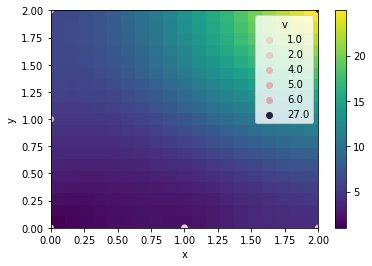

In [9]:
xn = np.linspace(0,2,20)
yn = np.linspace(0,2,20)

xx, yy = np.meshgrid(xn, yn)

dfun = pd.DataFrame({"x":xx.flatten(order='F'),"y":yy.flatten(order='F')})
cp2 = CloudPoints().from_df(dfun, x='x',y='y')

ok = OrdinaryKrigging(
    variogram_model = s,
    known_cp = cp,
    unknown_cp = cp2,
)

wm = ok.forward('v')

wm.plot_mesh('v')
cp.plot(hue='v')

In [10]:
wm.df()

,x,y,z,crs,v,v_variance
0,0.0,0.000000,None,None,1.000000,0.000000
1,0.0,0.105263,None,None,1.490796,0.569210
2,0.0,0.210526,None,None,1.975667,1.010920
3,0.0,0.315789,None,None,2.451439,1.321058
4,0.0,0.421053,None,None,2.914005,1.495907
...,...,...,...,...,...,...
395,2.0,1.578947,None,None,21.161871,2.145692
396,2.0,1.684211,None,None,22.652153,1.691182
397,2.0,1.789474,None,None,24.119838,1.177338
398,2.0,1.894737,None,None,25.571527,0.611270


In [11]:
#df = pd.read_csv('sample_data_biased.csv')     # load our data table
df2 = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_biased.csv')
dcp2 = CloudPoints().from_df(df2, x='X',y='Y', fields=['Facies','Porosity','Perm'])
dcp2.df()

,x,y,z,crs,Facies,Porosity,Perm
0,100.0,900.0,None,None,1.0,0.115359,5.736104
1,100.0,800.0,None,None,1.0,0.136425,17.211462
2,100.0,600.0,None,None,1.0,0.135810,43.724752
3,100.0,500.0,None,None,0.0,0.094414,1.609942
4,100.0,100.0,None,None,0.0,0.113049,10.886001
...,...,...,...,...,...,...,...
284,190.0,199.0,None,None,1.0,0.109411,3.247265
285,190.0,419.0,None,None,0.0,0.099541,1.528003
286,920.0,379.0,None,None,0.0,0.094099,2.514597
287,60.0,149.0,None,None,0.0,0.100167,3.636854


<AxesSubplot:>

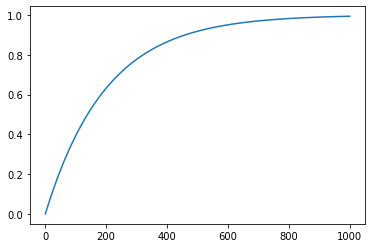

In [12]:
s = Exponential(
    sill = 1.,
    range = 200,
    nugget = 0.
)

s.plot(np.linspace(0,1000,50))

In [13]:
sc = NScaler()
sc.fit(dcp2.df()['Porosity'])
pnorm = sc.transform(dcp2.df()['Porosity'])
dcp2.add_field(pnorm, 'pnorm')
dcp2.df().describe()

,x,y,Facies,Porosity,Perm,pnorm
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,475.813149,529.692042,0.813149,0.134744,207.832368,-0.005546
std,254.277530,300.895374,0.390468,0.037745,559.359350,1.064579
min,0.000000,9.000000,0.000000,0.058548,0.075819,-6.361341
25%,300.000000,269.000000,1.000000,0.106318,3.634086,-0.713471
50%,430.000000,549.000000,1.000000,0.126167,14.908970,-0.011715
75%,670.000000,819.000000,1.000000,0.154220,71.454424,0.683694
max,990.000000,999.000000,1.000000,0.228790,5308.842566,6.361341


In [14]:
xn = np.linspace(0,1000,50)
yn = np.linspace(0,1000,50)

xx, yy = np.meshgrid(xn, yn)

dfun = pd.DataFrame({"x":xx.flatten(order='F'),"y":yy.flatten(order='F')})
cp2 = CloudPoints().from_df(dfun, x='x',y='y')
ok = OrdinaryKrigging(
    variogram_model = s,
    known_cp = dcp2,
    unknown_cp = cp2,
)

wm2 = ok.forward('pnorm')

df_un = wm2.df()
df_un['porosity'] = sc.inverse(df_un['pnorm'])
df_un

,x,y,z,crs,pnorm,pnorm_variance,porosity
0,0.0,0.000000,None,None,-0.865292,0.568502,0.102202
1,0.0,20.408163,None,None,-0.947106,0.427017,0.100192
2,0.0,40.816327,None,None,-0.956669,0.319771,0.099967
3,0.0,61.224490,None,None,-0.870882,0.247213,0.102060
4,0.0,81.632653,None,None,-0.927349,0.208434,0.100664
...,...,...,...,...,...,...,...
2495,1000.0,918.367347,None,None,-1.351188,0.532956,0.092210
2496,1000.0,938.775510,None,None,-1.566457,0.365936,0.085253
2497,1000.0,959.183673,None,None,-1.738672,0.219049,0.081135
2498,1000.0,979.591837,None,None,-1.750963,0.141373,0.080885


In [15]:
wm2.add_fields_from_df(df_un, ['porosity'])

wm2.df()

,x,y,z,crs,pnorm,pnorm_variance,porosity
0,0.0,0.000000,None,None,-0.865292,0.568502,0.102202
1,0.0,20.408163,None,None,-0.947106,0.427017,0.100192
2,0.0,40.816327,None,None,-0.956669,0.319771,0.099967
3,0.0,61.224490,None,None,-0.870882,0.247213,0.102060
4,0.0,81.632653,None,None,-0.927349,0.208434,0.100664
...,...,...,...,...,...,...,...
2495,1000.0,918.367347,None,None,-1.351188,0.532956,0.092210
2496,1000.0,938.775510,None,None,-1.566457,0.365936,0.085253
2497,1000.0,959.183673,None,None,-1.738672,0.219049,0.081135
2498,1000.0,979.591837,None,None,-1.750963,0.141373,0.080885


/Users/scuervo91/Documents/dev/volumetricspy/volumetricspy/stats/points.py:228: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  d = ax.pcolormesh(xx,yy,df.values, **kwargs)
/Users/scuervo91/Documents/dev/volumetricspy/volumetricspy/stats/points.py:229: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(d)


<AxesSubplot:xlabel='x', ylabel='y'>

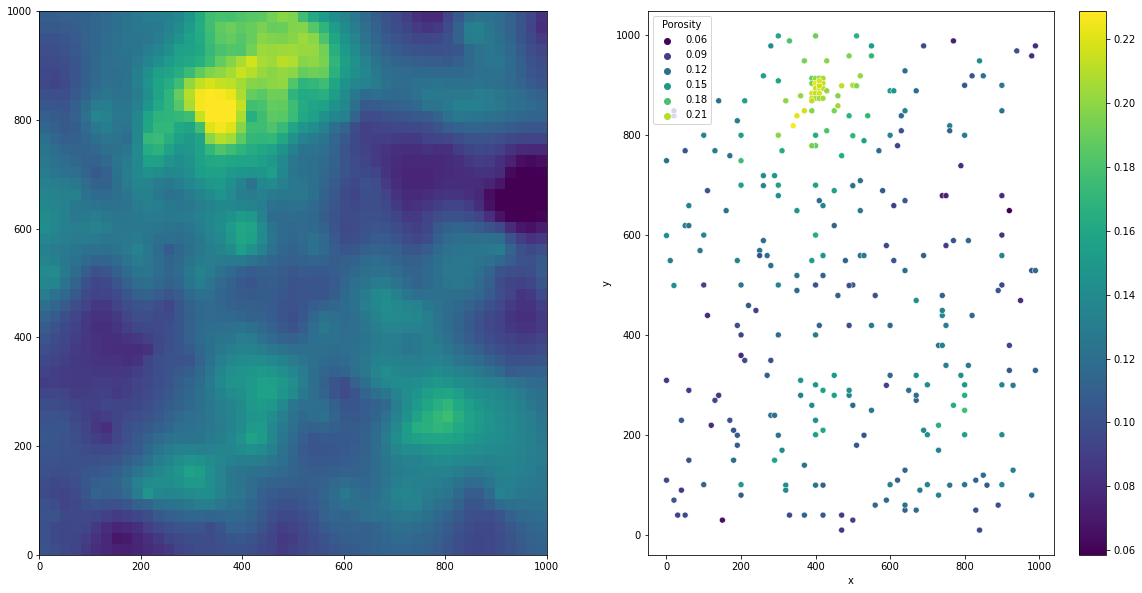

In [16]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
wm2.plot_mesh('porosity',ax=ax[0])
dcp2.plot(ax=ax[1], hue='Porosity', palette='viridis')

In [17]:
data=wm2.df()
data.describe()

,x,y,pnorm,pnorm_variance,porosity
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,500.000000,500.000000,-0.352387,0.285493,0.120293
std,294.566464,294.566464,0.859990,0.152539,0.027563
min,0.000000,0.000000,-5.813597,0.004097,0.058548
25%,244.897959,244.897959,-0.862767,0.186266,0.102266
50%,500.000000,500.000000,-0.311539,0.261856,0.117398
75%,755.102041,755.102041,0.145984,0.345809,0.131775
max,1000.000000,1000.000000,5.225835,0.990080,0.228790


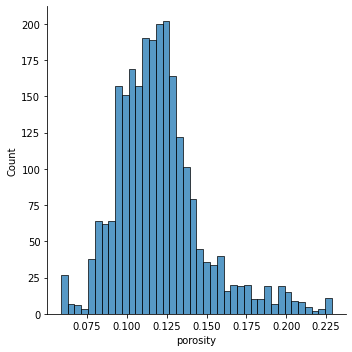

In [18]:
sns.displot(data=data.reset_index(), x='porosity', kde=False)

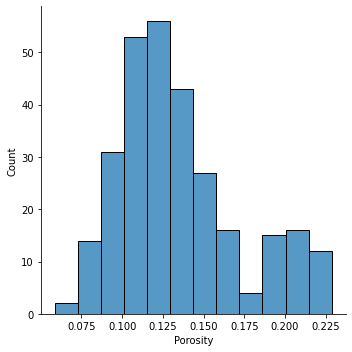

In [19]:
sns.displot(data=dcp2.df().reset_index(), x='Porosity', kde=False)

In [20]:
wm.df().columns

Index(['x', 'y', 'z', 'crs', 'v', 'v_variance'], dtype='object')

<AxesSubplot:xlabel='lag', ylabel='var'>

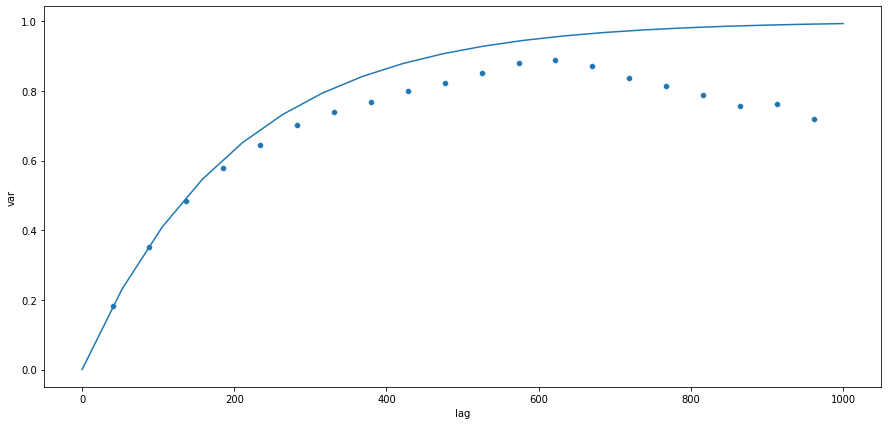

In [21]:
dfsm, sm = wm2.variogram('pnorm',lag_dist=50, lag_tol=10,nlags=20)
fig, ax = plt.subplots(1,1,figsize=(15,7))

sns.scatterplot(data=sm, x='lag', y='var', ax=ax)
s.plot(np.linspace(0,1000,20),ax=ax)